In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from mouselab import *
from bayes_q import *
from mouselab import *
from gymrats.core import Agent
from exact import solve

In [ ]:
R = Categorical([-1, 1])
env = MouselabEnv(2, 4, reward=R, cost=.05)
q, v, pi, info = solve(env)
v(env.init)

In [ ]:
policy = BayesianQLearner(5); Q = policy.Q
agent = Agent(env, policy)
df = pd.DataFrame(agent.run_many(1000))

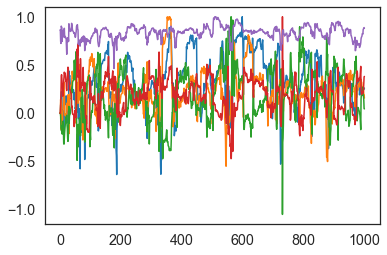

In [66]:
W = np.stack(policy.weight_log)
plt.plot(W / W.max(axis=0))

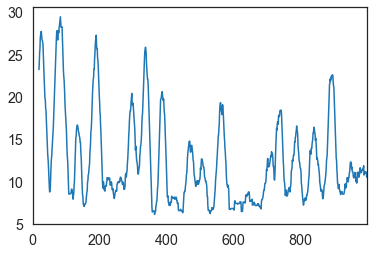

In [67]:
df.n_steps.rolling(20).mean().plot()

In [68]:
Q.weights.random()

array([ 8.03 ,  0.522, -0.127,  1.016,  1.013])

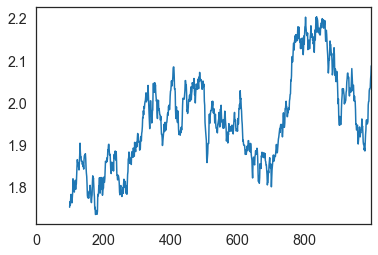

In [69]:
df.return_.rolling(100).mean().plot()